# Import the libraries

In [1]:
!pip install mlxtend

In [2]:
#basic libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning extensions
import mlxtend

# Explore the Bakery Data

In [3]:
items = pd.read_csv('BreadBasket_DMS.csv')

Here is a link to ["Bakery Data"](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery).

In [4]:
items.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [5]:
items.tail(10)

,Date,Time,Transaction,Item
21283,2017-04-09,14:30:09,9681,Tea
21284,2017-04-09,14:30:09,9681,Spanish Brunch
21285,2017-04-09,14:30:09,9681,Christmas common
21286,2017-04-09,14:32:58,9682,Muffin
21287,2017-04-09,14:32:58,9682,Tacos/Fajita
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [6]:
items.shape

(21293, 4)

In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


# Cleaning the data 

In [8]:
x = items['Item'] == 'NONE'
print(x.value_counts())

Item
False    20507
True       786
Name: count, dtype: int64


### Drop the items with values "NONE" 

In [9]:
items= items.drop(items[items.Item == 'NONE'].index)

In [10]:
items.shape

(20507, 4)

# Explore the data for Data Visualization

In [11]:
items['date_time'] = pd.to_datetime(items['Date'] + ' ' + items['Time'])
items.head()

,Date,Time,Transaction,Item,date_time
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [12]:
items['year_month'] = items['date_time'].map(lambda x: str(x.year) + '-' + str(x.month))
items['hour'] = items['date_time'].dt.hour
items['day_of_week'] = items['date_time'].dt.dayofweek
items['day'] = items['date_time'].dt.day_name()
items.sample(10)

,Date,Time,Transaction,Item,date_time,year_month,hour,day_of_week,day
6412,2016-12-12,15:46:25,3064,Juice,2016-12-12 15:46:25,2016-12,15,0,Monday
6145,2016-12-10,13:06:56,2936,Sandwich,2016-12-10 13:06:56,2016-12,13,5,Saturday
14894,2017-02-19,14:23:27,6881,Tea,2017-02-19 14:23:27,2017-2,14,6,Sunday
13287,2017-02-09,09:29:02,6247,Cookies,2017-02-09 09:29:02,2017-2,9,3,Thursday
2574,2016-11-13,11:07:58,1216,Tea,2016-11-13 11:07:58,2016-11,11,6,Sunday
9513,2017-01-11,15:49:43,4547,Coffee,2017-01-11 15:49:43,2017-1,15,2,Wednesday
8054,2016-12-27,13:57:15,3865,Coffee,2016-12-27 13:57:15,2016-12,13,1,Tuesday
13066,2017-02-06,16:37:37,6147,Toast,2017-02-06 16:37:37,2017-2,16,0,Monday
11273,2017-01-26,12:36:05,5365,Sandwich,2017-01-26 12:36:05,2017-1,12,3,Thursday
14629,2017-02-18,12:56:25,6795,Sandwich,2017-02-18 12:56:25,2017-2,12,5,Saturday


In [13]:
items['weekend_vs_weekday'] =items['date_time'].apply(\
                                                     lambda x: 'weekend' if x.dayofweek // 5 == 1 else 'weekday')
items.sample(10)

,Date,Time,Transaction,Item,date_time,year_month,hour,day_of_week,day,weekend_vs_weekday
16134,2017-03-01,15:08:05,7397,Tea,2017-03-01 15:08:05,2017-3,15,2,Wednesday,weekday
1073,2016-11-04,15:41:06,513,Brownie,2016-11-04 15:41:06,2016-11,15,4,Friday,weekday
1179,2016-11-05,10:26:16,556,Coffee,2016-11-05 10:26:16,2016-11,10,5,Saturday,weekend
3218,2016-11-17,13:53:52,1526,Coffee,2016-11-17 13:53:52,2016-11,13,3,Thursday,weekday
17225,2017-03-10,10:02:09,7873,Cookies,2017-03-10 10:02:09,2017-3,10,4,Friday,weekday
3494,2016-11-19,10:33:24,1659,Bread,2016-11-19 10:33:24,2016-11,10,5,Saturday,weekend
11809,2017-01-29,12:59:25,5600,Coffee,2017-01-29 12:59:25,2017-1,12,6,Sunday,weekend
15009,2017-02-20,15:39:27,6929,Hot chocolate,2017-02-20 15:39:27,2017-2,15,0,Monday,weekday
15603,2017-02-25,14:05:36,7185,Bread,2017-02-25 14:05:36,2017-2,14,5,Saturday,weekend
15410,2017-02-24,12:45:47,7106,Cake,2017-02-24 12:45:47,2017-2,12,4,Friday,weekday


In [14]:
transcation_by_month = items[['year_month',
                              'Transaction']].groupby('year_month', as_index=False).sum()
transcation_by_month.head()

,year_month,Transaction
0,2016-10,32288
1,2016-11,5599892
2,2016-12,10827910
3,2017-1,16519571
4,2017-2,25607531


This is the total number of transactions that occurred in this bakery on a monthly basis. We used groupby operation on the year_month column and calculated the sum. We see that the transactions are steadily increasing.

### Monthly Transactions

Text(0.5, 1.0, 'Number of transcations by month')

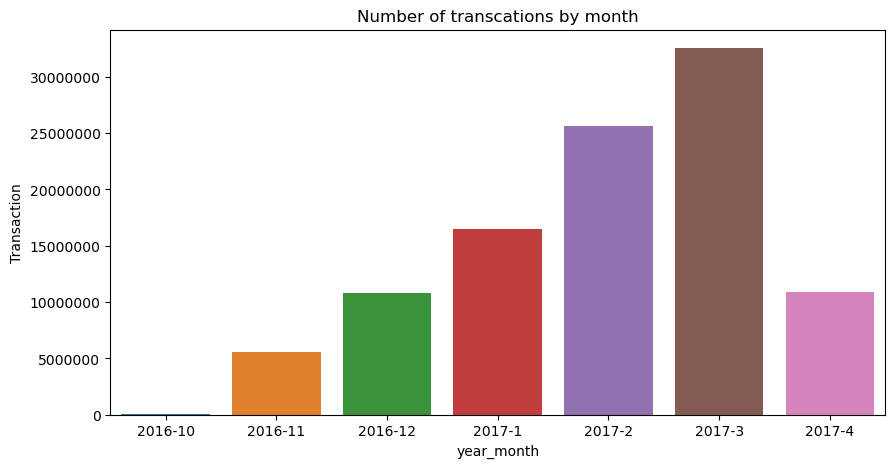

In [15]:
plt.figure(figsize = [10, 5])
sns.barplot(x ='year_month', y ='Transaction', data =transcation_by_month)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('Number of transcations by month')

Year_month versus number of transactions, and this bar plot shows you that we just have a few months' worth of data in this bakery dataset, and of all of the months, March of 2017 had the highest number of transactions.

### Daily Transactions

Text(0.5, 1.0, 'Number of transcations by day')

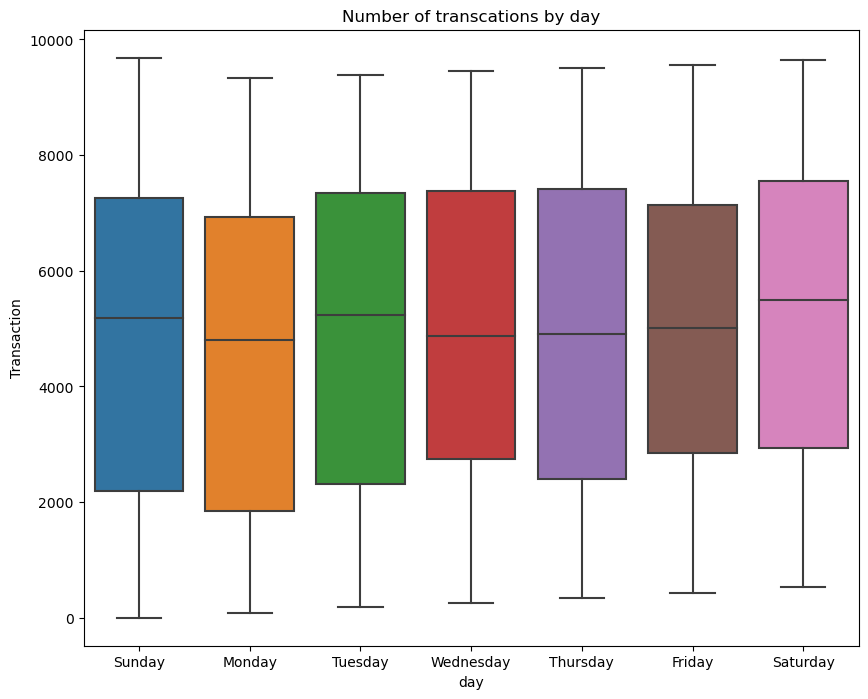

In [16]:
plt.figure(figsize = [10, 8])
sns.boxplot(x ='day', y ='Transaction', data = items)
plt.ticklabel_format(style = 'plain', axis ='y')
plt.title('Number of transcations by day')

You can see that the median across the days are more or less the same. The box itself represents the inter-quartile region; each of the boxes are of similar size as well.

### Weekend vs Weekday Transactions

Text(0.5, 1.0, 'Weekend vs Weekday')

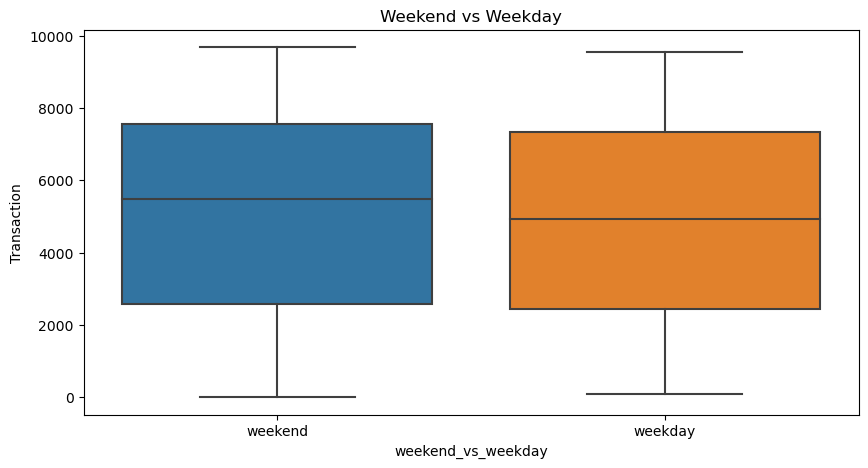

In [17]:
plt.figure(figsize = [10,5])
sns.boxplot(x ='weekend_vs_weekday', y='Transaction', data= items)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Weekend vs Weekday")

This box plot shows us that there is not much of a difference.The median values for weekends versus weekdays in terms of number of transactions is more or less the same, but if you consider the fact that there are more weekdays than weekends in the week, you can draw the conclusion that the bakery is rather busy on weekends. 

### Hourly Transactions

Text(0.5, 1.0, 'Sales by Hour')

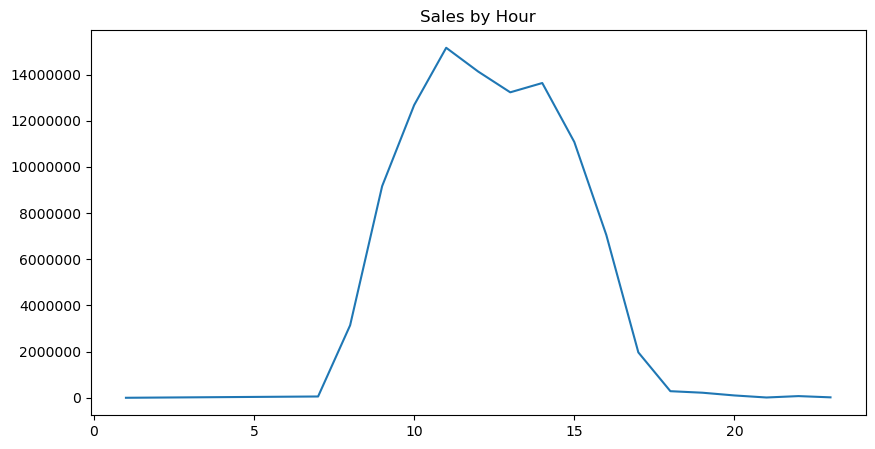

In [18]:
plt.figure(figsize=[10,5])
plt.plot(items[['hour','Transaction']].groupby('hour').sum())
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales by Hour')

The number of transactions in this bakery varies based on the hour. The line plot shows that the bakery opens at around eight in the morning, reaches the peak number of transactions at around 12, and closes at around 6 (x-asis 18:00) or 7 (x-axis 19:00) in the evening.

### Top 10 Items Sold

Text(0.5, 1.0, 'Top 10 Items Sold')

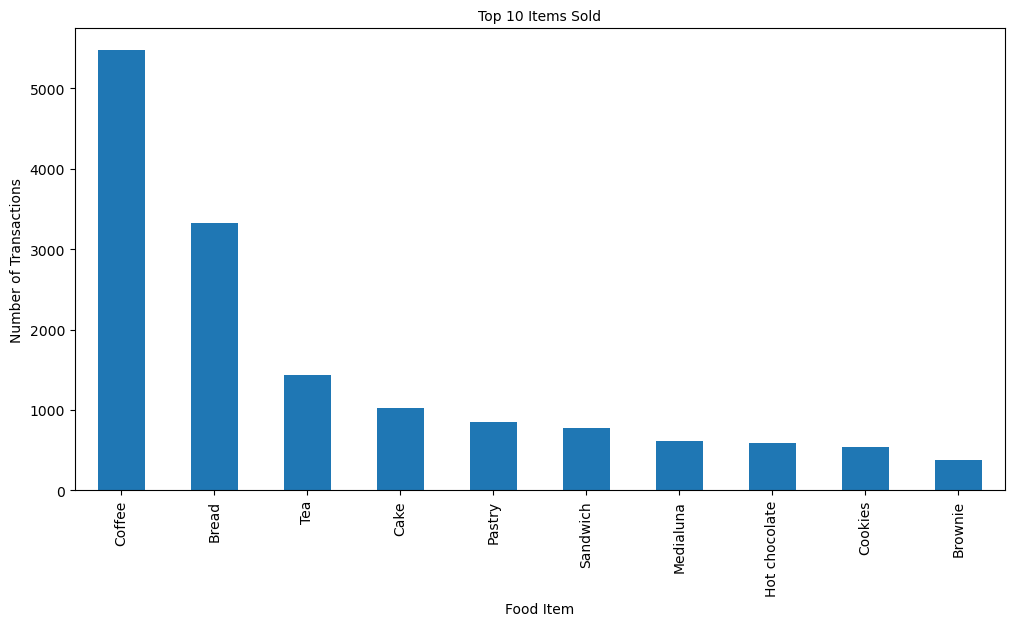

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
items['Item'].value_counts().sort_values(ascending = False).head(10).plot.bar()

plt.xlabel('Food Item', fontsize =10)
plt.ylabel('Number of Transactions', fontsize =10)

ax.tick_params(labelsize = 10)
plt.title('Top 10 Items Sold', fontsize = 10)

We can see that coffee is by far the most popular; it's present in the most number of transactions, then comes bread and then tea.

---

# Setting up the Data for Assosciation Rule Mining

Group our data by transaction. So, use the group-by operation on the transaction problem, and apply an aggregation to the other columns in the data frame and the aggregation simply joins the data available in the other columns, separated by the comma.

In [20]:
items_per_transaction = items.groupby('Transaction')['Item'].agg(lambda x: ','.join(x.astype(str))).reset_index()
items_per_transaction.head(5)

,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"


In [21]:
# items_per_transaction = items_per_transaction.drop(['Date','Time', 'year_month','day','weekend_vs_weekday'], axis=1)
items_per_transaction = items.groupby('Transaction')[['Item', 'Date', 'Time', 'year_month', 'day', 'weekend_vs_weekday']].agg(lambda x: ','.join(x.astype(str))).reset_index()
items_per_transaction.head(5)

,Transaction,Item,Date,Time,year_month,day,weekend_vs_weekday
0,1,Bread,2016-10-30,09:58:11,2016-10,Sunday,weekend
1,2,"Scandinavian,Scandinavian","2016-10-30,2016-10-30","10:05:34,10:05:34","2016-10,2016-10","Sunday,Sunday","weekend,weekend"
2,3,"Hot chocolate,Jam,Cookies","2016-10-30,2016-10-30,2016-10-30","10:07:57,10:07:57,10:07:57","2016-10,2016-10,2016-10","Sunday,Sunday,Sunday","weekend,weekend,weekend"
3,4,Muffin,2016-10-30,10:08:41,2016-10,Sunday,weekend
4,5,"Coffee,Pastry,Bread","2016-10-30,2016-10-30,2016-10-30","10:13:03,10:13:03,10:13:03","2016-10,2016-10,2016-10","Sunday,Sunday,Sunday","weekend,weekend,weekend"


In [22]:
items_per_transaction.Item

0                                              Bread
1                          Scandinavian,Scandinavian
2                          Hot chocolate,Jam,Cookies
3                                             Muffin
4                                Coffee,Pastry,Bread
                            ...                     
9460                                           Bread
9461    Truffles,Tea,Spanish Brunch,Christmas common
9462                  Muffin,Tacos/Fajita,Coffee,Tea
9463                                   Coffee,Pastry
9464                                       Smoothies
Name: Item, Length: 9465, dtype: object

In [23]:
#convert items into list form
items_list = [item.split(',') for item in items_per_transaction['Item']]
items_list

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

Set this items list up in a separate data frame with just one column. As below -

In [24]:
items_list_df = pd.DataFrame({'Items': items_list})
items_list_df.head(10)

,Items
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
5,"[Medialuna, Pastry, Muffin]"
6,"[Medialuna, Pastry, Coffee, Tea]"
7,"[Pastry, Bread]"
8,"[Bread, Muffin]"
9,"[Scandinavian, Medialuna]"


---

# Using the Apriori Algorithm to Generate Frequent Itemsets

### Encode transction data in the form of a Python list to a NumPy array of booleans


In [25]:
from mlxtend.preprocessing import TransactionEncoder
transcencoder = TransactionEncoder()
transcencoder_array = transcencoder.fit(items_list).transform(items_list)

In [26]:
transcencoder_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
transcencoder.columns_

['Adjustment',
 'Afternoon with the baker',
 'Alfajores',
 'Argentina Night',
 'Art Tray',
 'Bacon',
 'Baguette',
 'Bakewell',
 'Bare Popcorn',
 'Basket',
 'Bowl Nic Pitt',
 'Bread',
 'Bread Pudding',
 'Brioche and salami',
 'Brownie',
 'Cake',
 'Caramel bites',
 'Cherry me Dried fruit',
 'Chicken Stew',
 'Chicken sand',
 'Chimichurri Oil',
 'Chocolates',
 'Christmas common',
 'Coffee',
 'Coffee granules ',
 'Coke',
 'Cookies',
 'Crepes',
 'Crisps',
 'Drinking chocolate spoons ',
 'Duck egg',
 'Dulce de Leche',
 'Eggs',
 "Ella's Kitchen Pouches",
 'Empanadas',
 'Extra Salami or Feta',
 'Fairy Doors',
 'Farm House',
 'Focaccia',
 'Frittata',
 'Fudge',
 'Gift voucher',
 'Gingerbread syrup',
 'Granola',
 'Hack the stack',
 'Half slice Monster ',
 'Hearty & Seasonal',
 'Honey',
 'Hot chocolate',
 'Jam',
 'Jammie Dodgers',
 'Juice',
 'Keeping It Local',
 'Kids biscuit',
 'Lemon and coconut',
 'Medialuna',
 'Mighty Protein',
 'Mineral water',
 'Mortimer',
 'Muesli',
 'Muffin',
 'My-5 Fruit S

<b>Turn the encoded array into a pandas 'DataFrame' for our convenience<b>

In [28]:
items_df = pd.DataFrame(transcencoder_array, columns =transcencoder.columns_)
items_df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The rows are the transactions and the columns are the items that we could buy from the bakery. A cell contains a true or false value, indicating whether or not a particular item was present within a transaction.

In [29]:
items_df.shape

(9465, 94)

### Trancation - Coffee

In [30]:
coffee_df = items_df[items_df['Coffee'] == True]
coffee_df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There are a total of about 4500 transactions, which include coffee. With about 9500 transactions in total, almost 50% of them contain coffee. So coffee, will definitely be in our frequent itemset. 


In [31]:
coffee_df['Coffee']

4       True
6       True
11      True
12      True
15      True
        ... 
9454    True
9455    True
9458    True
9462    True
9463    True
Name: Coffee, Length: 4528, dtype: bool

Within this coffee_df, you'll find that all of the column values of the coffee column are set to true.

### Transaction - Bread

In [32]:
bread_df = items_df[items_df['Bread'] == True]
bread_df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There are roughly a total of about 3000 transactions, which include bread. This is also a frequently bought item.

### Transaction - Jam, Coffee & Bread

In [33]:
jam_coffee_bread_df = items_df[(items_df['Jam'] == True) &
                               (items_df['Coffee'] == True) &
                                (items_df['Bread'] == True)]
jam_coffee_bread_df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
474,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
640,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It has only 11 rows. This is clearly not a frequent itemset

In [34]:
jam_coffee_bread = jam_coffee_bread_df[['Jam', 'Coffee', 'Bread']]
jam_coffee_bread

,Jam,Coffee,Bread
474,True,True,True
520,True,True,True
522,True,True,True
640,True,True,True
643,True,True,True
938,True,True,True
1383,True,True,True
2257,True,True,True
2498,True,True,True
2832,True,True,True


### Use Apriori algorithm available in mlxtend

In [35]:
#import the apriori and association rules
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

1 Minimum Support - 0.1

In [36]:
items_frequent = apriori(items_df,
                         min_support =0.1,
                         use_colnames=True)
### alternatively:
#items_frequent = fpgrowth(items_df, min_support=0.6, use_colnames=True)
#items_frequent = fpmax(items_df, min_support=0.6, use_colnames=True)
items_frequent

,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.142631,(Tea)


We see that there are no combinations of items that meet this 10% min support threshold. Bread is present in about thirty-two percent of the transactions, coffee in about 47%.

2 Minimum Support - 0.09

In [37]:
items_frequent = apriori(items_df,
                         min_support =0.09,
                         use_colnames=True)
items_frequent

,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.142631,(Tea)
4,0.090016,"(Bread, Coffee)"


3 Minimum Support - 0.05

In [38]:
items_frequent = apriori(items_df,
                         min_support =0.05,
                         use_colnames=True)
items_frequent

,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.054411,(Cookies)
4,0.058320,(Hot chocolate)
5,0.061807,(Medialuna)
6,0.086107,(Pastry)
7,0.071844,(Sandwich)
8,0.142631,(Tea)
9,0.090016,"(Bread, Coffee)"


4 Minimum Support - 0.01

In [39]:
items_frequent = apriori(items_df,
                         min_support =0.01,
                         use_colnames=True)
items_frequent

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Bread, Cake, Coffee)"
59,0.011199,"(Coffee, Bread, Pastry)"


---

# Association Rule Mining

1 Level of confidence is above 70 percent threshold (min_threshold=0.7)

In [40]:
association = association_rules(items_frequent,
                 metric = "confidence",
                 min_threshold=0.7
                 )
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006


The customers at the bakery, if they buy Toast, there is a 70% probability of them including coffee as a part of the same transaction

2 Level of confidence is above 50 percent threshold (min_threshold=0.5)

In [41]:
association = association_rules(items_frequent,
                 metric = "confidence",
                 min_threshold=0.5
                 )
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
8,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
9,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851


The customers at the bakery, if they buy pastries or sandwiches or scones, there is a 50% probability of them including coffee as a part of the same transaction

3 Level of confidence is above 30 percent threshold (min_threshold=0.3)

In [42]:
association = association_rules(items_frequent,
                 metric = "confidence",
                 min_threshold=0.3
                 )
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
5,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
6,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
7,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
8,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,0.022579
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161


In [43]:
association = association_rules(items_frequent,
                 metric = "lift",
                 min_threshold= 1
                 )
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553


## Sorting the Association Rules 
### All rules with confidence greater than 50% sorted on the basis of confidence in the descending order, and these are the top 10 rules. 

In [44]:
association[association['confidence'] >= 0.5].sort_values('confidence',
                                                       ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


 The rules in which we have the highest confidence generally tend to involve coffee.

### Filter Operations (antecedents and the consequents in this association rules data frame are frozen sets so apply filters)

 1 Association rules where the antecedents include cake

In [45]:
association[association['antecedents'] == {'Cake'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
11,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
35,(Cake),"(Bread, Coffee)",0.103856,0.090016,0.010037,0.096643,1.073621,0.000688,1.007336,0.076520
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090


 2 Association rules where the consequents include bread

In [46]:
association[association['consequents'] == {'Bread'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Pastry),(Bread),0.086107,0.327205,0.02916,0.33865,1.034977,0.000985,1.017305,0.03698


 3 Association rules where the consequents include bread and coffee

In [47]:
association[association['consequents'] == {'Bread', 'Coffee'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,(Cake),"(Bread, Coffee)",0.103856,0.090016,0.010037,0.096643,1.073621,0.000688,1.007336,0.076520
37,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907


 4 Association rules where the antecedents include cake and coffee

In [48]:
association[association['antecedents'] == {'Cake', 'Coffee'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
39,"(Cake, Coffee)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157


In [49]:
from sklearn.metrics import f1_score

# Assume that rules with confidence >= 0.6 are considered "correct" (true positive)
# and rules with confidence < 0.6 are considered "incorrect" (false positive)
true_labels = [int(conf >= 0.6) for conf in association['confidence']]
predicted_labels = [1] * len(association)  # Assuming all rules are predicted as positive

# Calculate the F1 score
f1 = f1_score(true_labels, predicted_labels)
print(f"F1 score for association rules: {f1:.2f}")

F1 score for association rules: 0.05


In [50]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [53]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
from PIL import Image, ImageTk  # Import Image and ImageTk from PIL
import pandas as pd
from sklearn.metrics import f1_score

# Function to execute the code
def execute_code():
    try:
        items = pd.read_csv(file_path.get())
        # Your code goes here...
        messagebox.showinfo("Success", "Code executed successfully!")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Function to display transactions
def display_transactions():
    try:
        items_per_transaction = items.groupby('Transaction')['Item'].agg(lambda x: ','.join(x.astype(str))).reset_index()
        items_per_transaction_window = tk.Toplevel(root)
        items_per_transaction_window.title("Transactions")
        text = tk.Text(items_per_transaction_window)
        text.insert(tk.END, items_per_transaction.to_string())
        text.pack()
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Function to calculate F1 score and display association rules
def calculate_f1():
    try:
        true_labels = [int(conf >= 0.6) for conf in association['confidence']]
        predicted_labels = [1] * len(association)
        f1 = f1_score(true_labels, predicted_labels)
        messagebox.showinfo("F1 Score", f"F1 score for association rules: {f1:.2f}")

        # Display association rules
        association_window = tk.Toplevel(root)
        association_window.title("Association Rules")
        association_tree = ttk.Treeview(association_window)
        association_tree["columns"] = ("antecedents", "consequents", "support", "confidence", "lift")
        association_tree.heading("#0", text="Rule")
        association_tree.heading("antecedents", text="Antecedents")
        association_tree.heading("consequents", text="Consequents")
        association_tree.heading("support", text="Support")
        association_tree.heading("confidence", text="Confidence")
        association_tree.heading("lift", text="Lift")

        for i, row in association.iterrows():
            association_tree.insert("", "end", text=f"Rule {i+1}", values=(row['antecedents'], row['consequents'], 
                                                                            row['support'], row['confidence'], row['lift']))
        association_tree.pack()
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# GUI Setup
root = tk.Tk()
root.title("Market Basket Analysis")

# Heading Label
heading_label = tk.Label(root, text="Market Basket Analysis", font=("Helvetica", 20, "bold"))
heading_label.grid(row=0, column=0, columnspan=4, padx=5, pady=10)

# Set window size and position
window_width = 800
window_height = 600
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_coordinate = (screen_width / 2) - (window_width / 2)
y_coordinate = (screen_height / 2) - (window_height / 2)
root.geometry(f"{window_width}x{window_height}+{int(x_coordinate)}+{int(y_coordinate)}")

# Load and display an image
image_path = "C:\\Users\\jvenk\\Downloads\\BreadBasket_DMS\img2.jpg"  # Replace with your image path
try:
    image = Image.open(image_path)
    image = image.resize((300, 300), Image.ANTIALIAS)  # Resize image as needed
    photo = ImageTk.PhotoImage(image)

    image_label = tk.Label(root, image=photo)
    image_label.grid(row=1, column=4, rowspan=3, padx=5, pady=5)  # Adjust row and column as per your layout

    image_label.image = photo  # Keep a reference
except FileNotFoundError:
    messagebox.showerror("Error", "Image file not found.")

# File Path Entry
file_path_label = tk.Label(root, text="CSV File Path:")
file_path_label.grid(row=1, column=0, padx=5, pady=5)

file_path = tk.Entry(root, width=50)
file_path.grid(row=1, column=1, columnspan=2, padx=5, pady=5)

# Browse Button
def browse_file():
    file_path.delete(0, tk.END)
    file_path.insert(0, filedialog.askopenfilename())

browse_button = tk.Button(root, text="Browse", command=browse_file)
browse_button.grid(row=1, column=3, padx=5, pady=5)

# Execute Button
execute_button = tk.Button(root, text="Execute Code", command=execute_code)
execute_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5)

# Display Transactions Button
display_transactions_button = tk.Button(root, text="Display Transactions", command=display_transactions)
display_transactions_button.grid(row=2, column=2, columnspan=2, padx=5, pady=5)

# F1 Score Button
f1_score_button = tk.Button(root, text="Calculate F1 Score & Display Rules", command=calculate_f1)
f1_score_button.grid(row=3, column=0, columnspan=4, padx=5, pady=5)

# Run the GUI
root.mainloop()


<>:73: DeprecationWarning: invalid escape sequence '\i'
<>:73: DeprecationWarning: invalid escape sequence '\i'
C:\Users\jvenk\AppData\Local\Temp\ipykernel_24320\3046546134.py:73: DeprecationWarning: invalid escape sequence '\i'
  image_path = "C:\\Users\\jvenk\\Downloads\\BreadBasket_DMS\img2.jpg"  # Replace with your image path
C:\Users\jvenk\AppData\Local\Temp\ipykernel_24320\3046546134.py:76: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((300, 300), Image.ANTIALIAS)  # Resize image as needed
